## Installing Libraries

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df = pd.read_csv('Electric_Vehicle_Population_Data.csv')

In [28]:
df

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5UXTA6C0XM,Kitsap,Seabeck,WA,98380.0,2021,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30.0,0.0,35.0,267929112,POINT (-122.8728334 47.5798304),PUGET SOUND ENERGY INC,5.303509e+10
1,5YJ3E1EB1J,Kitsap,Poulsbo,WA,98370.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,0.0,23.0,475911439,POINT (-122.6368884 47.7469547),PUGET SOUND ENERGY INC,5.303509e+10
2,WP0AD2A73G,Snohomish,Bothell,WA,98012.0,2016,PORSCHE,PANAMERA,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,15.0,0.0,1.0,101971278,POINT (-122.206146 47.839957),PUGET SOUND ENERGY INC,5.306105e+10
3,5YJ3E1EB5J,Kitsap,Bremerton,WA,98310.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,0.0,23.0,474363746,POINT (-122.6231895 47.5930874),PUGET SOUND ENERGY INC,5.303508e+10
4,1N4AZ1CP3K,King,Redmond,WA,98052.0,2019,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,150.0,0.0,45.0,476346482,POINT (-122.13158 47.67858),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210160,KNDCM3LD8J,Grant,Moses Lake,WA,98837.0,2018,KIA,NIRO,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26.0,0.0,13.0,347733676,POINT (-119.2958738 47.1384772),PUD NO 2 OF GRANT COUNTY,5.302501e+10
210161,JM3KKBHA0R,Kitsap,Bremerton,WA,98312.0,2024,MAZDA,CX-90,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26.0,0.0,35.0,254263509,POINT (-122.6961203 47.5759584),PUGET SOUND ENERGY INC,5.303509e+10
210162,JTMAB3FV3P,Pierce,University Place,WA,98466.0,2023,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42.0,0.0,28.0,254488797,POINT (-122.538546 47.2298959),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305307e+10
210163,5YJ3E1EA1M,King,Kirkland,WA,98034.0,2021,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,1.0,137279852,POINT (-122.2026532 47.7210518),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10


## Data Processing

In [29]:
df.isnull().sum()

,0
VIN (1-10),0
County,4
City,4
State,0
Postal Code,4
Model Year,0
Make,0
Model,0
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0


In [30]:
df1 = df.drop(['VIN (1-10)','Base MSRP'], axis = 1)

In [31]:
df1 = df1.fillna({
    'County':'N/A',
    'City':'N/A',
    'Postal Code':'N/A',
    'Electric Range':0,
    'Legislative District':0,
    'Vehicle Location':0,
    'Electric Utility':'N/A',
    '2020 Census Tract':0
  })

## Grouping columns

In [32]:
distribution_EV_Types = df1.groupby(['County', 'City', 'Electric Vehicle Type']).size().reset_index(name='Count')
distribution_EV_Types

,County,City,Electric Vehicle Type,Count
0,Ada,Boise,Battery Electric Vehicle (BEV),2
1,Adams,Aurora,Battery Electric Vehicle (BEV),1
2,Adams,Hatton,Battery Electric Vehicle (BEV),1
3,Adams,Lind,Battery Electric Vehicle (BEV),1
4,Adams,Othello,Battery Electric Vehicle (BEV),27
...,...,...,...,...
1272,Yakima,Zillah,Battery Electric Vehicle (BEV),32
1273,Yakima,Zillah,Plug-in Hybrid Electric Vehicle (PHEV),7
1274,Yolo,Davis,Battery Electric Vehicle (BEV),3
1275,York,Yorktown,Battery Electric Vehicle (BEV),1


# Creating a Pivot Table to Summarize Electric Vehicle Counts by County and City

In [33]:
pivot_distribution = distribution_EV_Types.pivot_table(index=['County', 'City'], columns='Electric Vehicle Type', values='Count', fill_value=0)
pivot_distribution

Electric Vehicle Type  Battery Electric Vehicle (BEV)  \
County City                                             
Ada    Boise                                      2.0   
Adams  Aurora                                     1.0   
       Hatton                                     1.0   
       Lind                                       1.0   
       Othello                                   27.0   
...                                               ...   
Yakima Yakima                                   587.0   
       Zillah                                    32.0   
Yolo   Davis                                      3.0   
York   Yorktown                                   1.0   
Yuba   Beale Afb                                  1.0   

Electric Vehicle Type  Plug-in Hybrid Electric Vehicle (PHEV)  
County City                                                    
Ada    Boise                                              0.0  
Adams  Aurora                                             0.0  
       Hatton                                             0.0  
       Lind                                               0.0  
       Othello                                           14.0  
...                                                       ...  
Yakima Yakima                                           263.0  
       Zillah                                             7.0  
Yolo   Davis                                              0.0  
York   Yorktown                                           0.0  
Yuba   Beale Afb                                          0.0  

[826 rows x 2 columns]

# Grouping and Counting Electric Vehicle Models by Make and Electric Range

In [34]:
distribution_range = df1.groupby(['Make', 'Model'])['Electric Range'].size().reset_index()
distribution_range

,Make,Model,Electric Range
0,ACURA,ZDX,61
1,ALFA ROMEO,TONALE,84
2,AUDI,A3,567
3,AUDI,A7 E,11
4,AUDI,A8 E,3
...,...,...,...
148,VOLVO,V60,79
149,VOLVO,XC40,1171
150,VOLVO,XC60,1371
151,VOLVO,XC90,1766


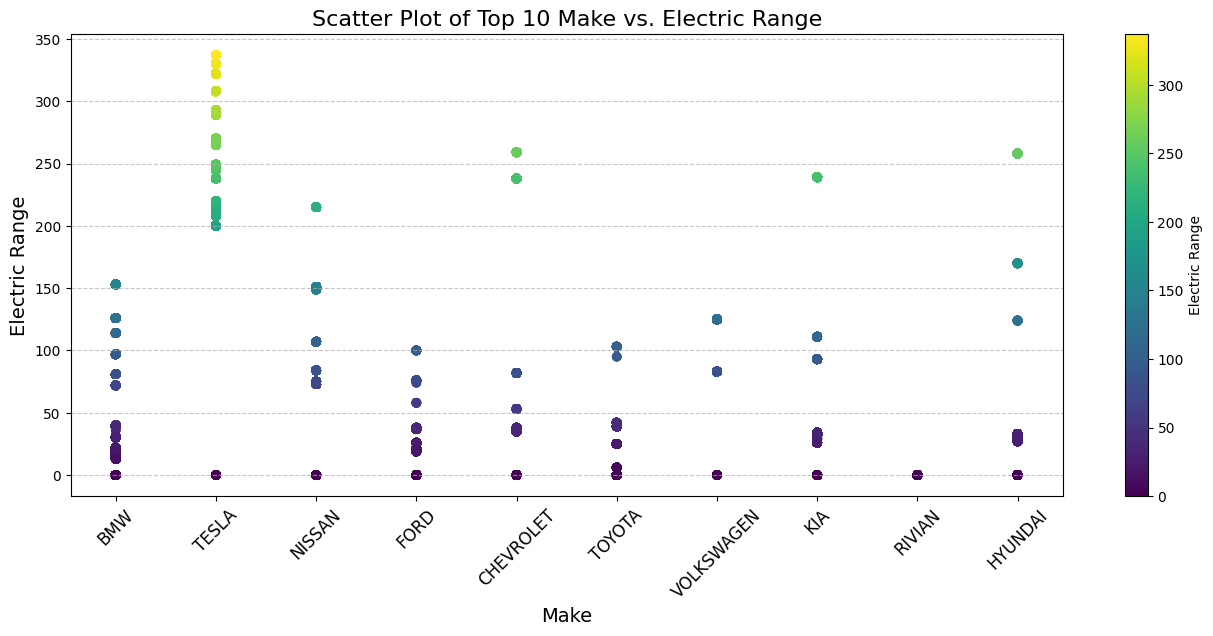

In [35]:
# Plotting a scatterplot for the above table considering only top 10

top_10_makes = df1['Make'].value_counts().head(10).index

filtered_df = df1[df1['Make'].isin(top_10_makes)]

plt.figure(figsize=(16, 6))
scatter_plot = plt.scatter(
    filtered_df['Make'],
    filtered_df['Electric Range'],
    c=filtered_df['Electric Range'],
    cmap='viridis'
)

plt.xlabel('Make', fontsize=14)
plt.ylabel('Electric Range', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.colorbar(scatter_plot, label='Electric Range')
plt.title('Scatter Plot of Top 10 Make vs. Electric Range', fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## Key Insights from above graph:



1.   **Tesla's Superior Electric Range**: Tesla cars tend to outclass other makes regarding electric range and ALWAYS top the charts to show their dominance in the EV market with electric range **near to 350**.

2.   **Extended Ranges-a Trend in Tesla Models**: Among the models produced by Tesla, one can trace a consistent pattern of longer electric ranges that indicate the emphasis of this brand on state-of-the-art battery technology.

3. 'RIVIAN' has the lowest electric range car with range near 0.



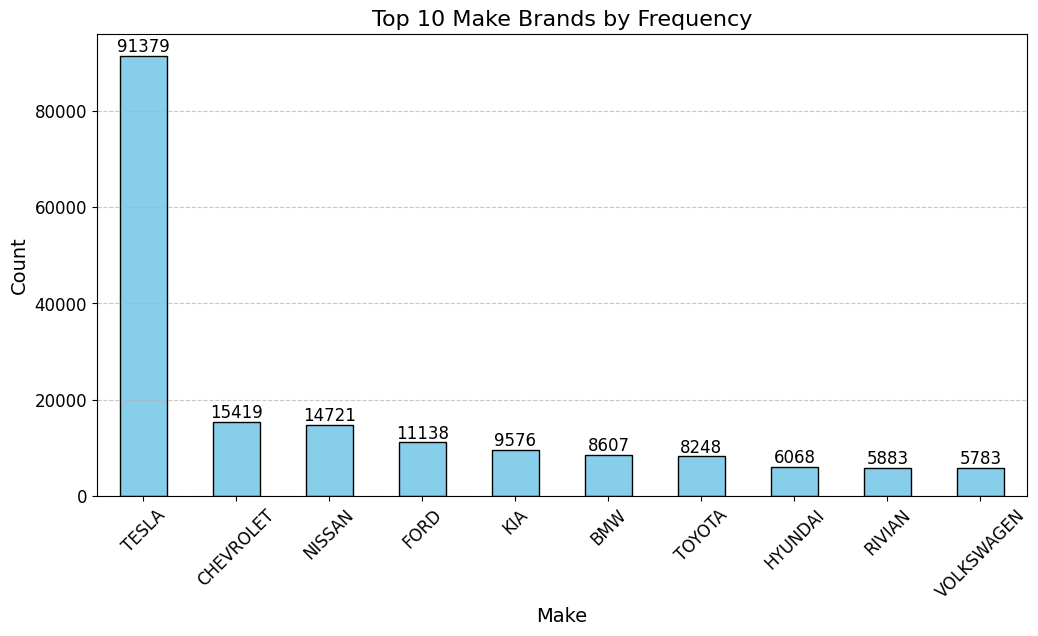

In [36]:
# Top 10 make brands by frequency
top_10_brands = df1['Make'].value_counts().head(10)

plt.figure(figsize=(12, 6))
ax = top_10_brands.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 10 Make Brands by Frequency', fontsize=16)
plt.xlabel('Make', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in ax.patches:
    count = int(bar.get_height())
    ax.annotate(
        f'{count}',
        (bar.get_x() + bar.get_width() / 2, bar.get_height()),
        ha='center',
        va='bottom',
        fontsize=12,
        color='black'
    )


plt.show()


## Key insights from above graph:

1.   **Tesla Market Leadership:** Tesla is leading in the electric vehicle market and stands tall amongst the top 10 most frequent makes, showing its presence amply with model count of 91379.

2.   **Volkswagen's Position in the Market:** Volkswagen takes 10th place with a total of 5,783 cars, showing its struggle to get a foothold in the highly competitive EV market.


## Creating an 'Electric_Range_Category' Column

In [37]:
#Electric Range

def electric_range_category(df, column='Electric Range'):
  def categorize_range(electric_range):
        if electric_range == 0:
            return "Unknown"
        elif electric_range < 150:
            return "Short"
        elif electric_range < 300:
            return "Medium"
        else:
            return "Long"

  df['Electric_Range_Category'] = df[column].apply(categorize_range)
  return df

df = electric_range_category(df, column='Electric Range')


In [38]:
display(df.head())

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract,Electric_Range_Category
0,5UXTA6C0XM,Kitsap,Seabeck,WA,98380.0,2021,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30.0,0.0,35.0,267929112,POINT (-122.8728334 47.5798304),PUGET SOUND ENERGY INC,5.303509e+10,Short
1,5YJ3E1EB1J,Kitsap,Poulsbo,WA,98370.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,0.0,23.0,475911439,POINT (-122.6368884 47.7469547),PUGET SOUND ENERGY INC,5.303509e+10,Medium
2,WP0AD2A73G,Snohomish,Bothell,WA,98012.0,2016,PORSCHE,PANAMERA,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,15.0,0.0,1.0,101971278,POINT (-122.206146 47.839957),PUGET SOUND ENERGY INC,5.306105e+10,Short
3,5YJ3E1EB5J,Kitsap,Bremerton,WA,98310.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,0.0,23.0,474363746,POINT (-122.6231895 47.5930874),PUGET SOUND ENERGY INC,5.303508e+10,Medium
4,1N4AZ1CP3K,King,Redmond,WA,98052.0,2019,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,150.0,0.0,45.0,476346482,POINT (-122.13158 47.67858),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10,Medium


<ipython-input-39-71c290ae5b6b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


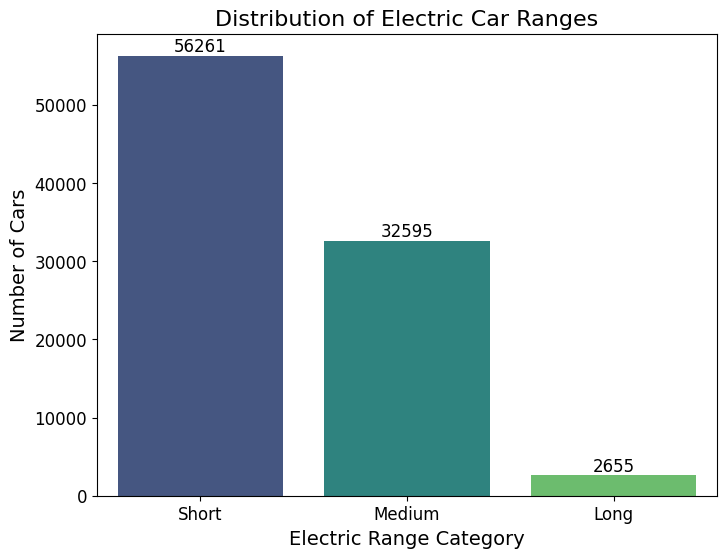

In [39]:
# Short, medium and long distribution of electric car ranges
plt.figure(figsize=(8, 6))
ax = sns.countplot(
    data=df,
    x='Electric_Range_Category',
    palette='viridis',
    order=["Short", "Medium", "Long"]
)

for container in ax.containers:
    ax.bar_label(container, fmt='%d', fontsize=12)

plt.title('Distribution of Electric Car Ranges', fontsize=16)
plt.xlabel('Electric Range Category', fontsize=14)
plt.ylabel('Number of Cars', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

## Key insights from above graph:

1. Most electric vehicles (total number = 56261) in the market fall into the "Short" category, meaning their electric range is less than 150 miles.

2. This would indicate that the few e-models currently available in the market place have limited electric ranges.

3. 2655 EVs have long electric range than rest of the others

## Trends in EV Adoption Over Time (Model Year Analysis)

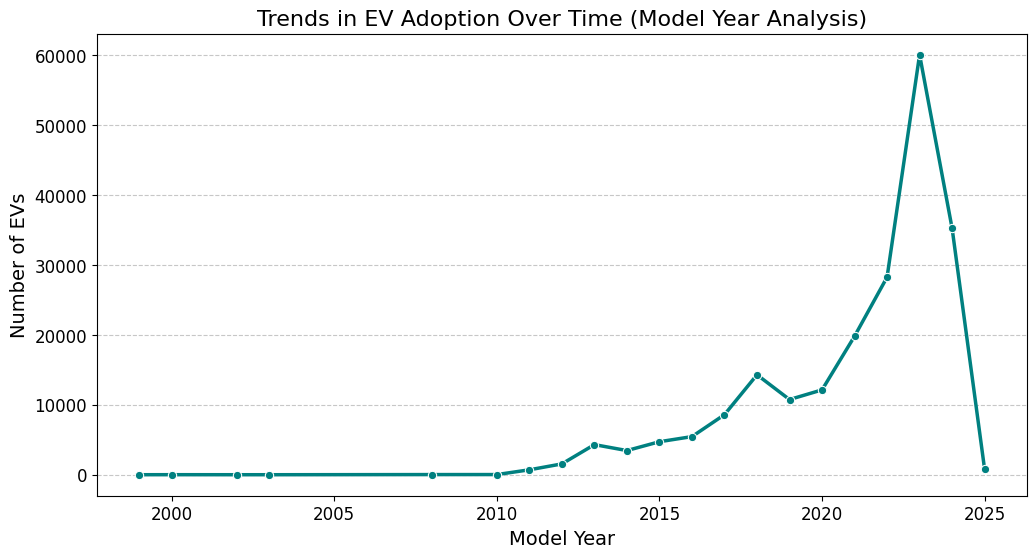

In [40]:
# Group by Model Year to analyze trends
model_year_trend = df.groupby('Model Year').size().reset_index(name='Count')

model_year_trend = model_year_trend.sort_values(by='Model Year')

plt.figure(figsize=(12, 6))
sns.lineplot(data=model_year_trend, x='Model Year', y='Count', marker='o', color='teal', linewidth=2.5)
plt.title('Trends in EV Adoption Over Time (Model Year Analysis)', fontsize=16)
plt.xlabel('Model Year', fontsize=14)
plt.ylabel('Number of EVs', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

## Key insights from the above graph:

The EV adoption started gradually increasing from 2010 and it reaches the peak production in between 2020-2025 with maximum of 60k model made.

## The distribution of EV types (BEV vs. PHEV)

<ipython-input-41-bebe2f425923>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


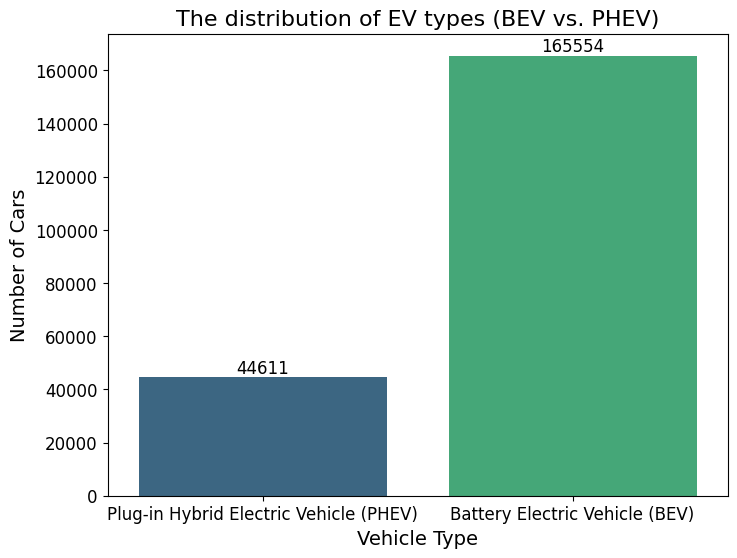

In [41]:
# Bar distribution of EV types
category_counts = df['Electric Vehicle Type'].value_counts()
bevs = category_counts.get("Battery Electric Vehicle (BEV)", 0)
phevs = category_counts.get("Plug-in Hybrid Electric Vehicle (PHEV)", 0)

plt.figure(figsize=(8, 6))
ax = sns.countplot(
    data=df,
    x='Electric Vehicle Type',
    order=["Plug-in Hybrid Electric Vehicle (PHEV)", "Battery Electric Vehicle (BEV)"],
    palette=sns.color_palette("viridis", 2),  # Correct way to assign a palette
)
plt.title('The distribution of EV types (BEV vs. PHEV)', fontsize=16)
plt.xlabel('Vehicle Type', fontsize=14)
plt.ylabel('Number of Cars', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

if ax.containers:
    counts = [phevs, bevs]
    for container, count in zip(ax.containers, counts):
        ax.bar_label(container, labels=[count], fontsize=12)

plt.show()

## Key insights from the above graph:

1. The graph illustrates the percentages of electric vehicle types, mainly Battery Electric Vehicles or BEVs, and Plug-in Hybrid Electric Vehicles or PHEVs.
2. BEVs dominate the dataset in terms of count, with **165554 records**, whereas PHEVs total **44611**.
3. It gives the breakdown with exact counts for each category of the representation of these two types of vehicles.


## Location Distribution of electric vehicle in Washington state.

In [42]:
#Created a new column name 'Location' which consists details of County, City & State
df['Location'] = df['County'] + ',' + df['City']  + ',' + df['State']
df

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract,Electric_Range_Category,Location
0,5UXTA6C0XM,Kitsap,Seabeck,WA,98380.0,2021,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30.0,0.0,35.0,267929112,POINT (-122.8728334 47.5798304),PUGET SOUND ENERGY INC,5.303509e+10,Short,"Kitsap,Seabeck,WA"
1,5YJ3E1EB1J,Kitsap,Poulsbo,WA,98370.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,0.0,23.0,475911439,POINT (-122.6368884 47.7469547),PUGET SOUND ENERGY INC,5.303509e+10,Medium,"Kitsap,Poulsbo,WA"
2,WP0AD2A73G,Snohomish,Bothell,WA,98012.0,2016,PORSCHE,PANAMERA,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,15.0,0.0,1.0,101971278,POINT (-122.206146 47.839957),PUGET SOUND ENERGY INC,5.306105e+10,Short,"Snohomish,Bothell,WA"
3,5YJ3E1EB5J,Kitsap,Bremerton,WA,98310.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,0.0,23.0,474363746,POINT (-122.6231895 47.5930874),PUGET SOUND ENERGY INC,5.303508e+10,Medium,"Kitsap,Bremerton,WA"
4,1N4AZ1CP3K,King,Redmond,WA,98052.0,2019,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,150.0,0.0,45.0,476346482,POINT (-122.13158 47.67858),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10,Medium,"King,Redmond,WA"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210160,KNDCM3LD8J,Grant,Moses Lake,WA,98837.0,2018,KIA,NIRO,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26.0,0.0,13.0,347733676,POINT (-119.2958738 47.1384772),PUD NO 2 OF GRANT COUNTY,5.302501e+10,Short,"Grant,Moses Lake,WA"
210161,JM3KKBHA0R,Kitsap,Bremerton,WA,98312.0,2024,MAZDA,CX-90,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26.0,0.0,35.0,254263509,POINT (-122.6961203 47.5759584),PUGET SOUND ENERGY INC,5.303509e+10,Short,"Kitsap,Bremerton,WA"
210162,JTMAB3FV3P,Pierce,University Place,WA,98466.0,2023,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42.0,0.0,28.0,254488797,POINT (-122.538546 47.2298959),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305307e+10,Short,"Pierce,University Place,WA"
210163,5YJ3E1EA1M,King,Kirkland,WA,98034.0,2021,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,1.0,137279852,POINT (-122.2026532 47.7210518),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10,Unknown,"King,Kirkland,WA"


<ipython-input-43-644fa353e1e5>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[1], palette='pastel')


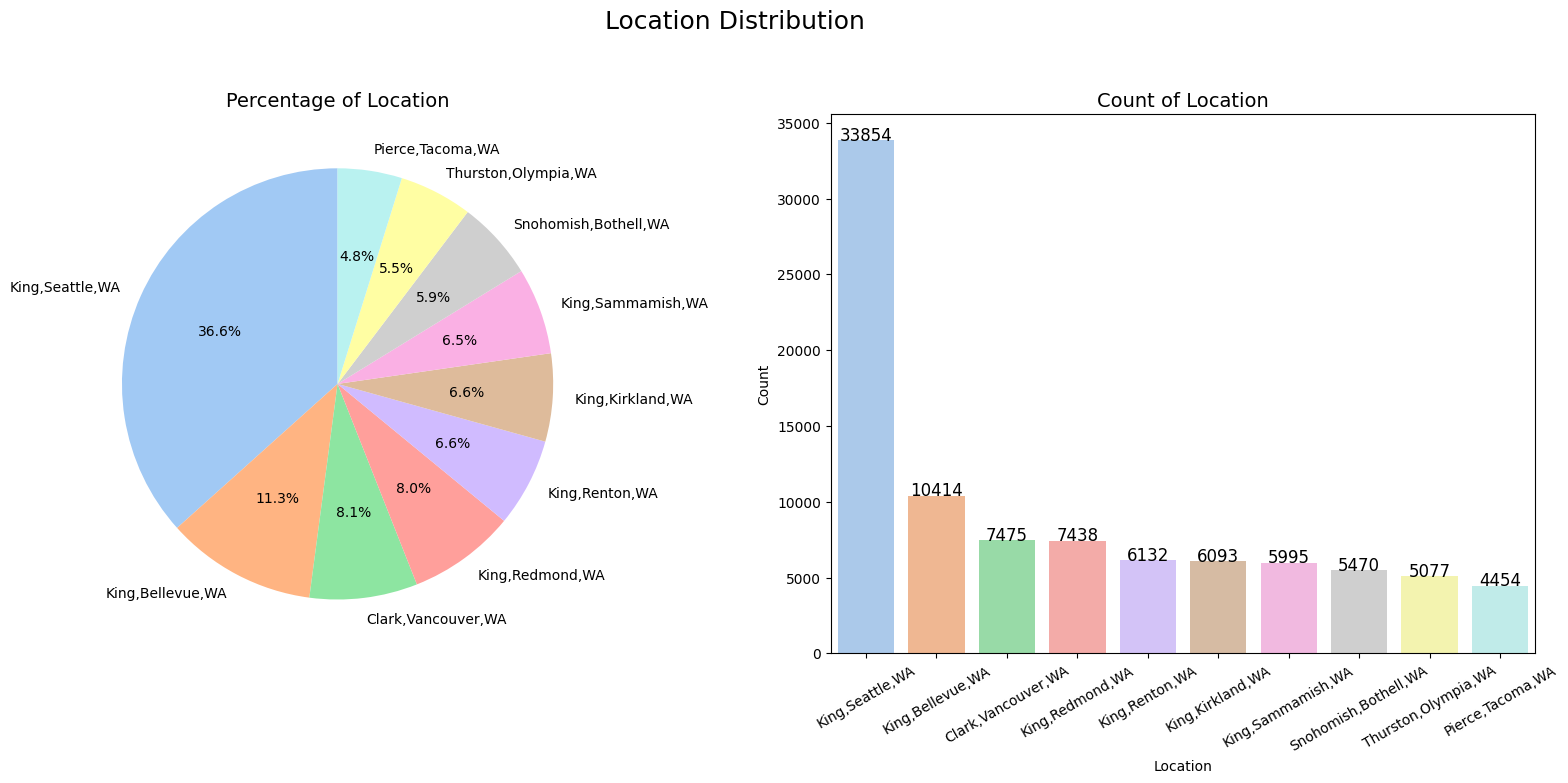

In [43]:
# Pie chart and bar plot of location wise EV adoption
def plot_value_counts(df, column, top_n=None):
    value_counts = df[column].value_counts()

    if top_n:
        value_counts = value_counts.head(top_n)

    fig, axes = plt.subplots(1, 2, figsize=(20, 7))

    value_counts.plot(kind='pie', ax=axes[0], autopct='%.1f%%', startangle=90, colors=sns.color_palette('pastel'))
    axes[0].set_ylabel('')
    axes[0].set_title(f'Percentage of {column}', fontsize=14)

    sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[1], palette='pastel')
    axes[1].set_title(f'Count of {column}', fontsize=14)
    axes[1].set_xlabel(column)
    axes[1].set_ylabel('Count')
    axes[1].tick_params(axis='x', rotation=30)

    for i, v in enumerate(value_counts.values):
        axes[1].text(i, v + 0.5, str(v), horizontalalignment='center', fontsize=12)

    fig.suptitle(f'{column} Distribution', fontsize=18, y=1.03)

    plt.show()

plot_value_counts(df, 'Location', top_n=10)

## Key insights from the above group:

1.  The location "King, Seattle" has the highest count of vehicles, outstandingly higher compared to other locations in the dataset with **36.6% adoption** of EV vehicles.

2. Pierce, Tacoma has the lowest EV adoption with **count of 4454 and 4.8% EV adoption rate** amongst other counties.

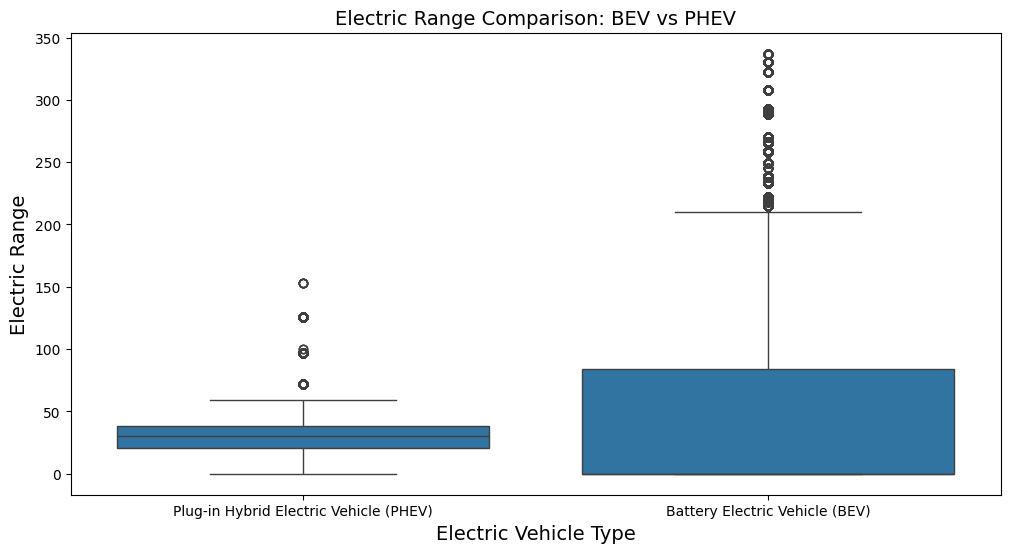

In [44]:
# Box plot of BEV vs PHEV electric range comparison
plt.figure(figsize=(12, 6))
sns.boxplot(data = df1, x = 'Electric Vehicle Type', y = 'Electric Range')
plt.title('Electric Range Comparison: BEV vs PHEV', fontsize = 14)
plt.xlabel('Electric Vehicle Type', fontsize = 14)
plt.ylabel('Electric Range', fontsize = 14)
plt.show()

# **Predictive Analysis using Random Forest Classifier**

In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [46]:
features = ['Model Year', 'Make', 'Electric Range']
label = 'Electric Vehicle Type'
# Categorical to numerical values
df1['Make'] = LabelEncoder().fit_transform(df1['Make'])
df1[label] = LabelEncoder().fit_transform(df1[label])
# Splitting
X = df1[features]
y = df1[label]
# 70% training data and 30% testing data taken
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Metrics Generation
y_pred = model.predict(X_test)
print('Model Accuracy: ', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Model Accuracy:  0.9999206978588422
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     49637
           1       1.00      1.00      1.00     13413

    accuracy                           1.00     63050
   macro avg       1.00      1.00      1.00     63050
weighted avg       1.00      1.00      1.00     63050



## Key points from the predictive analysis:

*   The model has 99% accuracy which is outstanding.
*   The precision is 1.00 for both 0 and 1 means it has no false positive cases.
*   The recall is also 1.00 for both the cases means it didn't miss any true positive values.




